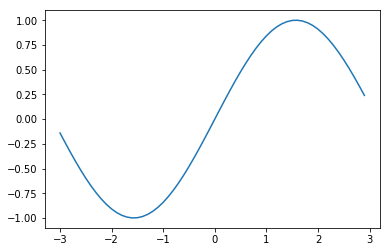

In [133]:
# TEMPORARY FOR TESTING LALALA
# TEMP - Tesing DUMP
x_test = np.array([1,-2,.3,-.1])
x_test = tf.keras.backend.constant(x_test)
A = tf.constant(tf.ones(np.array([4,4])))
b = tf.constant(tf.ones(4))
c = b
e = c

# For TESTS
from numpy import random
data_x = np.arange(-3,3,.1)
data_y = np.sin(data_x)
import matplotlib.pyplot as plt
plt.plot(data_x,data_y)
d = len(data_x)

# NEU Unit (Reconfiguration Map)

## Initialize Modules

###### Imports

In [141]:
# Deep Learning & ML
import tensorflow as tf
import keras as Kr
from keras import backend as K
from keras.models import Sequential
from keras import layers
from keras import utils as np_utils

# General
import numpy as np
import time

# Message Boxes
import tkinter
from tkinter import messagebox

### Define Reconfiguration Map

1. First applies the map $\psi(x)\triangleq e^{\frac1{1-|x|}}I_{\{|x|<1\}}$ component-wise.

2. Applies the diagonalization map to that output: $ \left(x_1,\dots,x_d\right)\mapsto
                \begin{pmatrix}
                x_1 & & 0\\
                &\ddots &\\
                0 & & x_d\\
                \end{pmatrix}$
3. Adds trainable $d\times d$ (weight) matrix $A$ and trainable bias (vector) $b \in \mathbb{R}^d$ to that output:

In [176]:
class reconfiguration(Kr.layers.Layer):

    class reconfiguration(tf.keras.layers.Layer):
    def __init__(self, *args, **kwargs):
        super(reconfiguration, self).__init__(*args, **kwargs)
    #def __init__(self, dim):
    #    super(reconfiguration, self).__init__()
    #    self.dim = dim

        # Initialize trainable Linear Endomorphism in Tangent Space
        self.weight = self.add_weight(shape=(dim,dim),trainable=True)
        # Initialize trainable Affine Shift in Tangent Space
        self.bias = self.add_weight(shape=(dim))
        # location parameter
        self.location = self.add_weight(shape=(dim))
        # scaling parameter
        self.scale = self.add_weight(shape=(dim))

    def call(self, input):
        # Shift and scale data
        #---------------------#
        # Shift 
        x_shift = input - self.location
        # Rescale
        x = tf.math.multiply(x_shift,self.scale)
        
        # Apply bumpy function & tangent space transformation
        #----------------------------------------------------#
        # 1) Bump Function
        x_in_abs = tf.math.abs(x)
        x_thresheld = tf.where(tf.math.abs(x) >= 1, 0 , tf.math.exp(tf.pow(1-x,-1)))
        # 2) Map to Diagonal Matrix & Apply Bias
        x_out = tf.expand_dims((x_thresheld + self.bias), 1) 
        # 3) Apply weights
        x_out = (x_out * self.weight) 
        # 4) Apply Matrix Exponential
        x_out = tf.linalg.expm(x_out)
        
        # Mulpliply Transformation with shifted data
        #--------------------------------------------#
        x_out = tf.linalg.matvec(x_out,x_shift)
        
        # Recenter Data
        #---------------#
        x_out = x_out + self.location
        
        # Return Ouput
        return x_out
        
    def reconfiguration(self):
        config = super(bump_function_layer, self).get_config()
        config['dim'] = self.dim
        return config

### Build Reconfiguration

In [177]:
class BiasLayer(tf.keras.layers.Layer):
    def __init__(self, *args, **kwargs):
        super(BiasLayer, self).__init__(*args, **kwargs)

    def build(self, input_shape):
        self.bias = self.add_weight('bias',
                                    shape=input_shape[1:],
                                    initializer='zeros',
                                    trainable=True)
    def call(self, x):
        return x + self.bias

input_layer = tf.keras.Input(shape=[5])
x  = reconfiguration()(input_layer)
model = tf.keras.Model(inputs=[input_layer], outputs=[x])

model.summary()

TypeError: __init__() missing 1 required positional argument: 'dim'